# 1. Business Understanding

In diesem Business Case geht es darum, Metriken aus dem Jadice Webtoolkit zu analysieren, um das Rendering von Dokumenten und die Lesezeit zu untersuchen. Ziel ist es, das Produkt besser kennenzulernen, mögliche Fehlerquellen zu identifizieren und Vorhersagemodelle zu erstellen, um das zukünftige Verhalten des Systems zu prognostizieren. Durch die Nutzung des Jadice Webtoolkits kann die Analyse direkt im Browser durchgeführt werden, ohne dass zusätzliche Software oder Hardware erforderlich sind. Die flexible Anpassbarkeit des Webtoolkits ermöglicht es auch, spezifische Anforderungen des Unternehmens zu berücksichtigen und das Aussehen und Verhalten der Lösung an die eigenen Bedürfnisse anzupassen. Mit den Werkzeugen, die das Jadice Webtoolkit bietet, können Anmerkungen auf Dokumenten angebracht, Inhalte extrahiert und schnell durch das Dokument navigiert werden, um relevante Informationen zu finden. Diese Funktionen können genutzt werden, um Metriken wie Lesezeit, Rendering-Dauer und andere Performance-Metriken zu erfassen und zu analysieren. Die Analyse der Metriken kann dabei helfen, Schwachstellen des Produkts zu identifizieren und mögliche Lösungen zu entwickeln, um die Leistung des Systems zu verbessern.

Das Jadice Webtoolkit bietet eine Fülle von Datenpunkten, die für eine prädiktive Analyse genutzt werden können, um Vorhersagen über die zukünftige Leistung des Systems zu treffen. Mithilfe von Machine-Learning-Modellen und fortschrittlicher Analyse können wir Vorhersagen darüber treffen, wie lange das Rendering von Dokumenten dauern wird und wie lange es dauern wird, bis diese Dokumente gelesen werden können. Indem wir diese Vorhersagemodelle kontinuierlich überwachen und aktualisieren, können wir potenzielle Fehlerquellen frühzeitig erkennen und beheben, bevor sie zu größeren Problemen führen. Wir können auch Vorhersagemodelle verwenden, um die Ressourcenanforderungen des Systems zu optimieren und die Effizienz zu maximieren. Insgesamt kann die prädiktive Analyse dazu beitragen, die Leistung und Zuverlässigkeit des Jadice Webtoolkits zu verbessern und den Nutzern ein nahtloses und reibungsloses Erlebnis zu bieten.

# 2. Data Understanding

Herkunft der Daten:
Die Daten, die in dieser Analyse verwendet werden, stammen aus einem lokalen Test. Der Test wurde auf einem lokalen Rechner durchgeführt und umfasste das Jadice webtoolkit (JWT), einen Docker Container Prometheus und den Lasttest mit Jmeter. Während des Tests wurde ein Beispieldokument geladen und es wurde ständig in das Dokument hinein- und herausgezoomt, um sowohl den Ladeprozess als auch den Renderprozess zu erfassen. Die erfassten Daten wurden über ein Python-Skript und die Prometheus-URL in eine CSV-Datei exportiert und gespeichert.

Beschreibung der Daten:
Der vorliegende Datensatz enthält 6977 Einträge und besteht aus 242 Spalten, darunter 79 Spalten vom Typ float64, 162 Spalten vom Typ int64 und eine Spalte vom Typ object. Die Metriken im Datensatz umfassen unter anderem Informationen über den Speicher, Threads, CPU-Zeiten und Netzwerkverbindungen des Jadice Webtoolkits (JWT) sowie die Dauer des Ladens und Renderings von Dokumenten.

## 2.1 Importieren der relevanten Bibliotheken

In diesem Schritt werden verschiedene Python-Pakete importiert, die für die Datenanalyse und das Modellieren benötigt werden. Zum Beispiel werden Pakete wie NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn und XGBoost importiert, die alle sehr beliebt in der Datenwissenschaft sind und häufig für die Arbeit mit Daten und Modellierung verwendet werden. Einige der Pakete, wie zum Beispiel Statsmodels und Seaborn, sind spezialisiert auf statistische Analysen und Visualisierungen, während andere, wie Scikit-learn und XGBoost, auf Machine-Learning und Modellierung spezialisiert sind. Es werden auch einige Einstellungen für Pandas vorgenommen, um sicherzustellen, dass alle Spalten in einem DataFrame angezeigt werden und die Fließkommazahlen mit neun Dezimalstellen angezeigt werden.

In [1]:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Daten Preperation
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

#Machine Learning Algo.
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

# Anzeige optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.9f}'.format)

## 2.2 Laden der Daten 

In diesem Schritt wird die CSV-Datei "Prometheusdata-JWT-Rendertest-08.csv" mit Pandas eingelesen und in das DataFrame "raw_data" gespeichert. Das DataFrame wird anschließend in der Jupyter Notebook-Zelle ausgegeben, um die geladenen Daten zu überprüfen.

In [3]:
raw_data = pd.read_csv("Prometheusdata-JWT-Rendertest-08.csv")
raw_data

,time,go_gc_duration_seconds\n,go_gc_duration_seconds_count\n,go_gc_duration_seconds_sum\n,go_goroutines\n,go_info\n,go_memstats_alloc_bytes\n,go_memstats_alloc_bytes_total\n,go_memstats_buck_hash_sys_bytes\n,go_memstats_frees_total\n,go_memstats_gc_cpu_fraction\n,go_memstats_gc_sys_bytes\n,go_memstats_heap_alloc_bytes\n,go_memstats_heap_idle_bytes\n,go_memstats_heap_inuse_bytes\n,go_memstats_heap_objects\n,go_memstats_heap_released_bytes\n,go_memstats_heap_sys_bytes\n,go_memstats_last_gc_time_seconds\n,go_memstats_lookups_total\n,go_memstats_mallocs_total\n,go_memstats_mcache_inuse_bytes\n,go_memstats_mcache_sys_bytes\n,go_memstats_mspan_inuse_bytes\n,go_memstats_mspan_sys_bytes\n,go_memstats_next_gc_bytes\n,go_memstats_other_sys_bytes\n,go_memstats_stack_inuse_bytes\n,go_memstats_stack_sys_bytes\n,go_memstats_sys_bytes\n,go_threads\n,http_server_requests_seconds_count\n,http_server_requests_seconds_max\n,http_server_requests_seconds_sum\n,jvm_buffer_count_buffers\n,jvm_buffer_memory_used_bytes\n,jvm_buffer_total_capacity_bytes\n,jvm_classes_loaded_classes\n,jvm_classes_unloaded_classes_total\n,jvm_gc_live_data_size_bytes\n,jvm_gc_max_data_size_bytes\n,jvm_gc_memory_allocated_bytes_total\n,jvm_gc_memory_promoted_bytes_total\n,jvm_gc_pause_seconds_count\n,jvm_gc_pause_seconds_max\n,jvm_gc_pause_seconds_sum\n,jvm_memory_committed_bytes\n,jvm_memory_max_bytes\n,jvm_memory_used_bytes\n,jvm_threads_daemon_threads\n,jvm_threads_live_threads\n,jvm_threads_peak_threads\n,jvm_threads_states_threads\n,jwt_read_document_seconds_count\n,jwt_read_document_seconds_max\n,jwt_read_document_seconds_sum\n,jwt_render_activeCount\n,jwt_render_corePoolSize\n,jwt_render_futuresQueueSize\n,jwt_render_largestPoolSize\n,jwt_render_maximumPoolSize\n,jwt_render_poolSize\n,jwt_render_queueSize\n,jwt_render_tile_seconds_count\n,jwt_render_tile_seconds_max\n,jwt_render_tile_seconds_sum\n,logback_events_total\n,net_conntrack_dialer_conn_attempted_total\n,net_conntrack_dialer_conn_closed_total\n,net_conntrack_dialer_conn_established_total\n,net_conntrack_dialer_conn_failed_total\n,net_conntrack_listener_conn_accepted_total\n,net_conntrack_listener_conn_closed_total\n,process_cpu_seconds_total\n,process_cpu_usage\n,process_max_fds\n,process_open_fds\n,process_resident_memory_bytes\n,process_start_time_seconds\n,process_uptime_seconds\n,process_virtual_memory_bytes\n,process_virtual_memory_max_bytes\n,prometheus_api_remote_read_queries\n,prometheus_build_info\n,prometheus_config_last_reload_success_timestamp_seconds\n,prometheus_config_last_reload_successful\n,prometheus_engine_queries\n,prometheus_engine_queries_concurrent_max\n,prometheus_engine_query_duration_seconds\n,prometheus_engine_query_duration_seconds_count\n,prometheus_engine_query_duration_seconds_sum\n,prometheus_engine_query_log_enabled\n,prometheus_engine_query_log_failures_total\n,prometheus_http_request_duration_seconds_bucket\n,prometheus_http_request_duration_seconds_count\n,prometheus_http_request_duration_seconds_sum\n,prometheus_http_requests_total\n,prometheus_http_response_size_bytes_bucket\n,prometheus_http_response_size_bytes_count\n,prometheus_http_response_size_bytes_sum\n,prometheus_notifications_alertmanagers_discovered\n,prometheus_notifications_dropped_total\n,prometheus_notifications_queue_capacity\n,prometheus_notifications_queue_length\n,prometheus_remote_storage_exemplars_in_total\n,prometheus_remote_storage_highest_timestamp_in_seconds\n,prometheus_remote_storage_samples_in_total\n,prometheus_remote_storage_string_interner_zero_reference_releases_total\n,prometheus_rule_evaluation_duration_seconds\n,prometheus_rule_evaluation_duration_seconds_count\n,prometheus_rule_evaluation_duration_seconds_sum\n,prometheus_rule_group_duration_seconds\n,prometheus_rule_group_duration_seconds_count\n,prometheus_rule_group_duration_seconds_sum\n,prometheus_sd_consul_rpc_duration_seconds\n,prometheus_sd_consul_rpc_duration_seconds_count\n,prometheus_sd_consul_rpc_duration_seconds_sum\n,pr

In [ ]:
def read_file(url):

    """
    Takes GitHub url as an argument,
    pulls CSV file located @ github URL.

    """

    url = url + "?raw=true"
    df = pd.read_csv(url)
    return df


# READ FILE FROM GITHUB REPO 
# CHANGE THE URL TO YOUR DATA LOCATION!
url = "https://github.com/r-kokoschka-levigo/DataScience_Levigo/blob/main/01_Jadice%20Webtoolkit/Lesezeit_Vorhersage/Prometheusdata-JWT-Rendertest-08.csv"

raw_data= read_file(url)

In [4]:
# print the data information
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6977 entries, 0 to 6976
Columns: 242 entries, time to up
dtypes: float64(79), int64(162), object(1)
memory usage: 12.9+ MB


In [5]:
# print the information about each feature
raw_data.describe()

,time,go_gc_duration_seconds\n,go_gc_duration_seconds_count\n,go_gc_duration_seconds_sum\n,go_goroutines\n,go_info\n,go_memstats_alloc_bytes\n,go_memstats_alloc_bytes_total\n,go_memstats_buck_hash_sys_bytes\n,go_memstats_frees_total\n,go_memstats_gc_cpu_fraction\n,go_memstats_gc_sys_bytes\n,go_memstats_heap_alloc_bytes\n,go_memstats_heap_idle_bytes\n,go_memstats_heap_inuse_bytes\n,go_memstats_heap_objects\n,go_memstats_heap_released_bytes\n,go_memstats_heap_sys_bytes\n,go_memstats_last_gc_time_seconds\n,go_memstats_lookups_total\n,go_memstats_mallocs_total\n,go_memstats_mcache_inuse_bytes\n,go_memstats_mcache_sys_bytes\n,go_memstats_mspan_inuse_bytes\n,go_memstats_mspan_sys_bytes\n,go_memstats_next_gc_bytes\n,go_memstats_other_sys_bytes\n,go_memstats_stack_inuse_bytes\n,go_memstats_stack_sys_bytes\n,go_memstats_sys_bytes\n,go_threads\n,http_server_requests_seconds_count\n,http_server_requests_seconds_max\n,http_server_requests_seconds_sum\n,jvm_buffer_count_buffers\n,jvm_buffer_memory_used_bytes\n,jvm_buffer_total_capacity_bytes\n,jvm_classes_loaded_classes\n,jvm_classes_unloaded_classes_total\n,jvm_gc_live_data_size_bytes\n,jvm_gc_max_data_size_bytes\n,jvm_gc_memory_allocated_bytes_total\n,jvm_gc_memory_promoted_bytes_total\n,jvm_gc_pause_seconds_count\n,jvm_gc_pause_seconds_max\n,jvm_gc_pause_seconds_sum\n,jvm_memory_committed_bytes\n,jvm_memory_max_bytes\n,jvm_memory_used_bytes\n,jvm_threads_daemon_threads\n,jvm_threads_live_threads\n,jvm_threads_peak_threads\n,jvm_threads_states_threads\n,jwt_read_document_seconds_count\n,jwt_read_document_seconds_max\n,jwt_read_document_seconds_sum\n,jwt_render_activeCount\n,jwt_render_corePoolSize\n,jwt_render_futuresQueueSize\n,jwt_render_largestPoolSize\n,jwt_render_maximumPoolSize\n,jwt_render_poolSize\n,jwt_render_queueSize\n,jwt_render_tile_seconds_count\n,jwt_render_tile_seconds_max\n,jwt_render_tile_seconds_sum\n,logback_events_total\n,net_conntrack_dialer_conn_attempted_total\n,net_conntrack_dialer_conn_closed_total\n,net_conntrack_dialer_conn_established_total\n,net_conntrack_dialer_conn_failed_total\n,net_conntrack_listener_conn_accepted_total\n,net_conntrack_listener_conn_closed_total\n,process_cpu_seconds_total\n,process_cpu_usage\n,process_max_fds\n,process_open_fds\n,process_resident_memory_bytes\n,process_start_time_seconds\n,process_uptime_seconds\n,process_virtual_memory_bytes\n,prometheus_api_remote_read_queries\n,prometheus_build_info\n,prometheus_config_last_reload_success_timestamp_seconds\n,prometheus_config_last_reload_successful\n,prometheus_engine_queries\n,prometheus_engine_queries_concurrent_max\n,prometheus_engine_query_duration_seconds\n,prometheus_engine_query_duration_seconds_count\n,prometheus_engine_query_duration_seconds_sum\n,prometheus_engine_query_log_enabled\n,prometheus_engine_query_log_failures_total\n,prometheus_http_request_duration_seconds_bucket\n,prometheus_http_request_duration_seconds_count\n,prometheus_http_request_duration_seconds_sum\n,prometheus_http_requests_total\n,prometheus_http_response_size_bytes_bucket\n,prometheus_http_response_size_bytes_count\n,prometheus_http_response_size_bytes_sum\n,prometheus_notifications_alertmanagers_discovered\n,prometheus_notifications_dropped_total\n,prometheus_notifications_queue_capacity\n,prometheus_notifications_queue_length\n,prometheus_remote_storage_exemplars_in_total\n,prometheus_remote_storage_highest_timestamp_in_seconds\n,prometheus_remote_storage_samples_in_total\n,prometheus_remote_storage_string_interner_zero_reference_releases_total\n,prometheus_rule_evaluation_duration_seconds\n,prometheus_rule_evaluation_duration_seconds_count\n,prometheus_rule_evaluation_duration_seconds_sum\n,prometheus_rule_group_duration_seconds\n,prometheus_rule_group_duration_seconds_count\n,prometheus_rule_group_duration_seconds_sum\n,prometheus_sd_consul_rpc_duration_seconds\n,prometheus_sd_consul_rpc_duration_seconds_count\n,prometheus_sd_consul_rpc_duration_seconds_sum\n,prometheus_sd_consul_rpc_failures_tot

In [6]:
raw_data.columns

Index(['time', 'go_gc_duration_seconds\n', 'go_gc_duration_seconds_count\n',
       'go_gc_duration_seconds_sum\n', 'go_goroutines\n', 'go_info\n',
       'go_memstats_alloc_bytes\n', 'go_memstats_alloc_bytes_total\n',
       'go_memstats_buck_hash_sys_bytes\n', 'go_memstats_frees_total\n',
       ...
       'scrape_series_added\n', 'system_cpu_count\n', 'system_cpu_usage\n',
       'tomcat_sessions_active_current_sessions\n',
       'tomcat_sessions_active_max_sessions\n',
       'tomcat_sessions_alive_max_seconds\n',
       'tomcat_sessions_created_sessions_total\n',
       'tomcat_sessions_expired_sessions_total\n',
       'tomcat_sessions_rejected_sessions_total\n', 'up'],
      dtype='object', length=242)

## 2.3 Datenbereinigung

Data Cleaning ist ein wichtiger Schritt in der Datenanalyse, bei dem Daten von unerwünschten und fehlerhaften Werten bereinigt werden, um die Qualität und Konsistenz der Daten zu verbessern. Im vorliegenden Projekt ist das Data Cleaning wichtig, um sicherzustellen, dass nur relevante und qualitativ hochwertige Daten in die Analyse einbezogen werden. Unerwünschte Daten können die Ergebnisse der Analyse beeinträchtigen und zu falschen Schlussfolgerungen führen, weshalb es wichtig ist, sie vor der Analyse zu entfernen.

### Dataframe reduzieren nach relevanten Metriken

Um die Datenanalyse zu erleichtern, ist es oft sinnvoll, den Datensatz auf diejenigen Metriken zu reduzieren, die für das Problem relevant sind. Dies kann erreicht werden, indem man den DataFrame auf die relevanten Metriken filtert und alle anderen Metriken entfernt, da diese nicht weiter benötigt werden.

In [7]:
relevant_metrics=["jvm_buffer_count_buffers\n","jvm_buffer_memory_used_bytes\n","jvm_buffer_total_capacity_bytes\n","jvm_classes_loaded_classes\n"
              ,"jvm_classes_unloaded_classes_total\n","jvm_gc_live_data_size_bytes\n","jvm_gc_max_data_size_bytes\n","jvm_gc_memory_allocated_bytes_total\n",
              "jvm_gc_memory_promoted_bytes_total\n","jvm_gc_pause_seconds_count\n", "jvm_gc_pause_seconds_max\n","jvm_memory_committed_bytes\n",
              "jvm_memory_max_bytes\n","jvm_memory_used_bytes\n","jvm_threads_daemon_threads\n","jvm_threads_live_threads\n","jvm_threads_peak_threads\n",
              "jwt_read_document_seconds_count\n","jwt_read_document_seconds_max\n", "jwt_read_document_seconds_sum\n", "jwt_render_activeCount\n",
              "jwt_render_corePoolSize\n","jwt_render_futuresQueueSize\n","jwt_render_largestPoolSize\n","jwt_render_maximumPoolSize\n", "jwt_render_poolSize\n",
              "jwt_render_tile_seconds_count\n", "jwt_render_tile_seconds_max\n","jwt_render_tile_seconds_sum\n","net_conntrack_listener_conn_accepted_total\n",
              "net_conntrack_listener_conn_closed_total\n", "process_cpu_seconds_total\n","process_cpu_usage\n","process_open_fds\n","process_resident_memory_bytes\n",
              "process_start_time_seconds\n","process_uptime_seconds\n","process_virtual_memory_bytes\n","system_cpu_count\n","system_cpu_usage\n","up"]

In [8]:
# Dataframe with only relevant Metrics
data = raw_data[relevant_metrics]

### Suche nach Duplikaten

In diesem Schritt wird überprüft, ob es Duplikate im Datensatz gibt. Die Funktion duplicated() markiert Zeilen, die exakt doppelt vorhanden sind, und mit dem Argument keep=False werden alle markierten Zeilen zurückgegeben.

In [9]:
# test for duplicates
data[data.duplicated(keep = False)]

,jvm_buffer_count_buffers\n,jvm_buffer_memory_used_bytes\n,jvm_buffer_total_capacity_bytes\n,jvm_classes_loaded_classes\n,jvm_classes_unloaded_classes_total\n,jvm_gc_live_data_size_bytes\n,jvm_gc_max_data_size_bytes\n,jvm_gc_memory_allocated_bytes_total\n,jvm_gc_memory_promoted_bytes_total\n,jvm_gc_pause_seconds_count\n,jvm_gc_pause_seconds_max\n,jvm_memory_committed_bytes\n,jvm_memory_max_bytes\n,jvm_memory_used_bytes\n,jvm_threads_daemon_threads\n,jvm_threads_live_threads\n,jvm_threads_peak_threads\n,jwt_read_document_seconds_count\n,jwt_read_document_seconds_max\n,jwt_read_document_seconds_sum\n,jwt_render_activeCount\n,jwt_render_corePoolSize\n,jwt_render_futuresQueueSize\n,jwt_render_largestPoolSize\n,jwt_render_maximumPoolSize\n,jwt_render_poolSize\n,jwt_render_tile_seconds_count\n,jwt_render_tile_seconds_max\n,jwt_render_tile_seconds_sum\n,net_conntrack_listener_conn_accepted_total\n,net_conntrack_listener_conn_closed_total\n,process_cpu_seconds_total\n,process_cpu_usage\n,process_open_fds\n,process_resident_memory_bytes\n,process_start_time_seconds\n,process_uptime_seconds\n,process_virtual_memory_bytes\n,system_cpu_count\n,system_cpu_usage\n,up
4,52.000000000,640839.000000000,640839.000000000,13960.000000000,757.000000000,575843416.000000000,1408237568.000000000,152511494848.000000000,8249778040.000000000,1.000000000,0.224000000,284688384.000000000,699400192.000000000,219599248.000000000,334.000000000,351.000000000,359.000000000,170.000000000,0.000000000,618.316473100,0.000000000,8.000000000,0.000000000,8.000000000,8.000000000,8.000000000,347.000000000,0.000000000,151.141233900,1,0,0.150000000,0.058194947,14,59416576,1628879554.089999914,16751.233000000,790884352,8.000000000,0.148080306,1
5,52.000000000,640839.000000000,640839.000000000,13960.000000000,757.000000000,575843416.000000000,1408237568.000000000,152511494848.000000000,8249778040.000000000,1.000000000,0.224000000,284688384.000000000,699400192.000000000,219599248.000000000,334.000000000,351.000000000,359.000000000,170.000000000,0.000000000,618.316473100,0.000000000,8.000000000,0.000000000,8.000000000,8.000000000,8.000000000,347.000000000,0.000000000,151.141233900,1,0,0.150000000,0.058194947,14,59416576,1628879554.089999914,16751.233000000,790884352,8.000000000,0.148080306,1
6,52.000000000,640839.000000000,640839.000000000,13960.000000000,757.000000000,575843416.000000000,1408237568.000000000,152511494848.000000000,8249778040.000000000,1.000000000,0.224000000,284688384.000000000,699400192.000000000,219599248.000000000,334.000000000,351.000000000,359.000000000,170.000000000,0.000000000,618.316473100,0.000000000,8.000000000,0.000000000,8.000000000,8.000000000,8.000000000,347.000000000,0.000000000,151.141233900,1,0,0.150000000,0.058194947,14,59416576,1628879554.089999914,16751.233000000,790884352,8.000000000,0.148080306,1
7,52.000000000,640839.000000000,640839.000000000,13960.000000000,757.000000000,575843416.000000000,1408237568.000000000,152511494848.000000000,8249778040.000000000,1.000000000,0.224000000,284688384.000000000,699400192.000000000,219599248.000000000,334.000000000,351.000000000,359.000000000,170.000000000,0.000000000,618.316473100,0.000000000,8.000000000,0.000000000,8.000000000,8.000000000,8.000000000,347.000000000,0.000000000,151.141233900,1,0,0.150000000,0.058194947,14,59416576,1628879554.089999914,16751.233000000,790884352,8.000000000,0.148080306,1
8,52.000000000,640839.000000000,640839.000000000,13960.000000000,757.000000000,575843416.000000000,1408237568.000000000,152511494848.000000000,8249778040.000000000,1.000000000,0.224000000,284688384.000000000,699400192.000000000,219599248.000000000,334.000000000,351.000000000,359.000000000,170.000000000,0.000000000,618.316473100,0.000000000,8.000000000,0.000000000,8.000000000,8.000000000,8.000000000,347.000000000,0.000000000,151.141233900,1,0,0.150000000,0.058194947,14,59416576,1628879554.089999914,16751.233000000,790884352,8.000000000,0.148080306,1
...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [10]:
data = data.drop_duplicates(keep='first', inplace=False)

In [11]:
data[data.duplicated(keep=False)]

,jvm_buffer_count_buffers\n,jvm_buffer_memory_used_bytes\n,jvm_buffer_total_capacity_bytes\n,jvm_classes_loaded_classes\n,jvm_classes_unloaded_classes_total\n,jvm_gc_live_data_size_bytes\n,jvm_gc_max_data_size_bytes\n,jvm_gc_memory_allocated_bytes_total\n,jvm_gc_memory_promoted_bytes_total\n,jvm_gc_pause_seconds_count\n,jvm_gc_pause_seconds_max\n,jvm_memory_committed_bytes\n,jvm_memory_max_bytes\n,jvm_memory_used_bytes\n,jvm_threads_daemon_threads\n,jvm_threads_live_threads\n,jvm_threads_peak_threads\n,jwt_read_document_seconds_count\n,jwt_read_document_seconds_max\n,jwt_read_document_seconds_sum\n,jwt_render_activeCount\n,jwt_render_corePoolSize\n,jwt_render_futuresQueueSize\n,jwt_render_largestPoolSize\n,jwt_render_maximumPoolSize\n,jwt_render_poolSize\n,jwt_render_tile_seconds_count\n,jwt_render_tile_seconds_max\n,jwt_render_tile_seconds_sum\n,net_conntrack_listener_conn_accepted_total\n,net_conntrack_listener_conn_closed_total\n,process_cpu_seconds_total\n,process_cpu_usage\n,process_open_fds\n,process_resident_memory_bytes\n,process_start_time_seconds\n,process_uptime_seconds\n,process_virtual_memory_bytes\n,system_cpu_count\n,system_cpu_usage\n,up


### Checking isNull


In diesem Schritt werden fehlende Werte im Datensatz überprüft und dann entfernt. Zunächst wird mit der Methode isnull().sum() die Anzahl der fehlenden Werte pro Spalte ermittelt. Anschließend wird der DataFrame data mit der Methode dropna(axis=0) um die Zeilen bereinigt, die mindestens einen fehlenden Wert enthalten. Diese bereinigte Version des Datensatzes wird der Variable df zugewiesen.

In [12]:
# looking for the sum of missing values
data.isnull().sum()

jvm_buffer_count_buffers\n                       181
jvm_buffer_memory_used_bytes\n                   181
jvm_buffer_total_capacity_bytes\n                181
jvm_classes_loaded_classes\n                     181
jvm_classes_unloaded_classes_total\n             181
jvm_gc_live_data_size_bytes\n                    181
jvm_gc_max_data_size_bytes\n                     181
jvm_gc_memory_allocated_bytes_total\n            181
jvm_gc_memory_promoted_bytes_total\n             181
jvm_gc_pause_seconds_count\n                    6562
jvm_gc_pause_seconds_max\n                      6562
jvm_memory_committed_bytes\n                     181
jvm_memory_max_bytes\n                           181
jvm_memory_used_bytes\n                          181
jvm_threads_daemon_threads\n                     181
jvm_threads_live_threads\n                       181
jvm_threads_peak_threads\n                       181
jwt_read_document_seconds_count\n                277
jwt_read_document_seconds_max\n               

In [13]:
data = data.drop("jvm_gc_pause_seconds_max\n",axis = 1)

In [14]:
data = data.drop("jvm_gc_pause_seconds_count\n",axis = 1)

In [15]:
df= data.dropna(axis=0)

Dieser Schritt setzt den Index des Dataframes `df` zurück. Wenn in einem Pandas-Dataframe `reset_index()` ohne weitere Argumente aufgerufen wird, wird eine neue Index-Spalte mit aufsteigenden ganzzahligen Werten erstellt und der ursprüngliche Index wird in eine neue Spalte mit dem Namen "index" verschoben.

In [16]:
df = df.reset_index()

### Daten manipulation

In diesem Schritt wird eine Funktion get_average_time() definiert, die den durchschnittlichen Zeitunterschied zwischen dem aktuellen Zeitstempel und dem vorherigen Zeitstempel berechnet. Die Funktion wird anschließend in einer Schleife auf den gesamten Dataframe df angewendet, um den durchschnittlichen Zeitunterschied für die Metrik "jwt_read_document_seconds" zu berechnen. Der berechnete Durchschnittswert wird dann in eine neue Spalte "jwt_read_document_seconds_average" im Dataframe eingefügt. Der Zweck dieser Berechnung besteht darin, eine bessere Einschätzung der durchschnittlichen Verarbeitungszeit für das jadice Webtoolkit zu erhalten.

Da der Prometheus in einem Intervall von 5 Sekunden die Daten aufzeichnet, kann man durch die Differenz der Werte zwischen dem aktuellen und dem vorherigen Zeitpunkt und der Differenz der zugehörigen Zählerwerte den Durchschnitt über das Intervall berechnen. Das ermöglicht eine bessere Interpretation der Daten und eine aussagekräftigere Analyse.

In [17]:
def get_avarage_time(old_count, new_count, old_time, new_time):
    return ((new_time - old_time) / (new_count - old_count))

In [18]:
avg_times = []
for index, row in df.iterrows():
    if index == 0:
        avg_times.append('NaN')
    else:
        new_count = row["jwt_read_document_seconds_count\n"]
        old_count = df["jwt_read_document_seconds_count\n"].loc[index - 1]
        new_time = row["jwt_read_document_seconds_sum\n"]
        old_time = df["jwt_read_document_seconds_sum\n"].loc[index - 1] 
        avg_time = get_avarage_time(old_count, new_count, old_time, new_time)
        avg_times.append(avg_time)
df["jwt_read_document_seconds_avarage"] = avg_times

/var/folders/w6/65lhxpsx2_s1y2sh4rfcqv840000gn/T/ipykernel_87320/2960426712.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return ((new_time - old_time) / (new_count - old_count))


Die Anwendung der oben genannten Funktion zur Berechnung der durchschnittlichen Zeit führte zur Erstellung neuer Nullwerte im Datensatz. Diese neu generierten Nullwerte wurden im nächsten Schritt entfernt, um die Daten sauber zu halten und weitere Analyseverfahren nicht zu beeinträchtigen.

In [19]:
df.isnull().sum()

index                                              0
jvm_buffer_count_buffers\n                         0
jvm_buffer_memory_used_bytes\n                     0
jvm_buffer_total_capacity_bytes\n                  0
jvm_classes_loaded_classes\n                       0
jvm_classes_unloaded_classes_total\n               0
jvm_gc_live_data_size_bytes\n                      0
jvm_gc_max_data_size_bytes\n                       0
jvm_gc_memory_allocated_bytes_total\n              0
jvm_gc_memory_promoted_bytes_total\n               0
jvm_memory_committed_bytes\n                       0
jvm_memory_max_bytes\n                             0
jvm_memory_used_bytes\n                            0
jvm_threads_daemon_threads\n                       0
jvm_threads_live_threads\n                         0
jvm_threads_peak_threads\n                         0
jwt_read_document_seconds_count\n                  0
jwt_read_document_seconds_max\n                    0
jwt_read_document_seconds_sum\n               

In [20]:
df_read = df.dropna(axis=0,subset=["jwt_read_document_seconds_avarage"])
df_read = df_read.astype({"jwt_read_document_seconds_avarage":float})

In [21]:
df_read.isnull().sum()

index                                           0
jvm_buffer_count_buffers\n                      0
jvm_buffer_memory_used_bytes\n                  0
jvm_buffer_total_capacity_bytes\n               0
jvm_classes_loaded_classes\n                    0
jvm_classes_unloaded_classes_total\n            0
jvm_gc_live_data_size_bytes\n                   0
jvm_gc_max_data_size_bytes\n                    0
jvm_gc_memory_allocated_bytes_total\n           0
jvm_gc_memory_promoted_bytes_total\n            0
jvm_memory_committed_bytes\n                    0
jvm_memory_max_bytes\n                          0
jvm_memory_used_bytes\n                         0
jvm_threads_daemon_threads\n                    0
jvm_threads_live_threads\n                      0
jvm_threads_peak_threads\n                      0
jwt_read_document_seconds_count\n               0
jwt_read_document_seconds_max\n                 0
jwt_read_document_seconds_sum\n                 0
jwt_render_activeCount\n                        0


In [22]:
df_read.head()

,index,jvm_buffer_count_buffers\n,jvm_buffer_memory_used_bytes\n,jvm_buffer_total_capacity_bytes\n,jvm_classes_loaded_classes\n,jvm_classes_unloaded_classes_total\n,jvm_gc_live_data_size_bytes\n,jvm_gc_max_data_size_bytes\n,jvm_gc_memory_allocated_bytes_total\n,jvm_gc_memory_promoted_bytes_total\n,jvm_memory_committed_bytes\n,jvm_memory_max_bytes\n,jvm_memory_used_bytes\n,jvm_threads_daemon_threads\n,jvm_threads_live_threads\n,jvm_threads_peak_threads\n,jwt_read_document_seconds_count\n,jwt_read_document_seconds_max\n,jwt_read_document_seconds_sum\n,jwt_render_activeCount\n,jwt_render_corePoolSize\n,jwt_render_futuresQueueSize\n,jwt_render_largestPoolSize\n,jwt_render_maximumPoolSize\n,jwt_render_poolSize\n,jwt_render_tile_seconds_count\n,jwt_render_tile_seconds_max\n,jwt_render_tile_seconds_sum\n,net_conntrack_listener_conn_accepted_total\n,net_conntrack_listener_conn_closed_total\n,process_cpu_seconds_total\n,process_cpu_usage\n,process_open_fds\n,process_resident_memory_bytes\n,process_start_time_seconds\n,process_uptime_seconds\n,process_virtual_memory_bytes\n,system_cpu_count\n,system_cpu_usage\n,up,jwt_read_document_seconds_avarage
0,0,52.000000000,640839.000000000,640839.000000000,13960.000000000,757.000000000,575843416.000000000,1408237568.000000000,152511494848.000000000,8249778040.000000000,284688384.000000000,699400192.000000000,134249256.000000000,334.000000000,351.000000000,359.000000000,170.000000000,0.000000000,618.316473100,0.000000000,8.000000000,0.000000000,8.000000000,8.000000000,8.000000000,347.000000000,0.000000000,151.141233900,1,0,0.100000000,0.021411749,14,56991744,1628879554.089999914,16731.657000000,790884352,8.000000000,0.107272018,1,NaN
86,91,53.000000000,654596.000000000,654596.000000000,14183.000000000,757.000000000,575843416.000000000,1408237568.000000000,155675090832.000000000,8366783432.000000000,311427072.000000000,612892672.000000000,65434568.000000000,336.000000000,353.000000000,359.000000000,171.000000000,1.140314200,619.456787300,0.000000000,8.000000000,0.000000000,8.000000000,8.000000000,8.000000000,348.000000000,0.046585200,151.187819100,321,318,5.200000000,0.115799675,16,79405056,1628879606.660000086,17191.224000000,791146496,8.000000000,0.192096319,1,1.140314200
87,92,54.000000000,654901.000000000,654901.000000000,14183.000000000,757.000000000,575843416.000000000,1408237568.000000000,155675090832.000000000,8366783432.000000000,311427072.000000000,612892672.000000000,164553400.000000000,336.000000000,353.000000000,359.000000000,172.000000000,1.140314200,619.778688900,0.000000000,8.000000000,0.000000000,8.000000000,8.000000000,8.000000000,349.000000000,0.075315600,151.263134700,321,318,5.200000000,0.062240245,16,79405056,1628879606.660000086,17196.215000000,791146496,8.000000000,0.102775061,1,0.321901600
94,99,55.000000000,655184.000000000,655184.000000000,14183.000000000,757.000000000,575843416.000000000,1408237568.000000000,155986517904.000000000,8405924008.000000000,296747008.000000000,580386816.000000000,87627432.000000000,336.000000000,353.000000000,359.000000000,173.000000000,1.140314200,620.267813500,0.000000000,8.000000000,0.000000000,8.000000000,8.000000000,8.000000000,350.000000000,0.075315600,151.328398900,368,365,6.050000000,0.067741752,16,81948672,1628879606.660000086,17231.217000000,791146496,8.000000000,0.108081528,1,0.489124600
95,100,56.000000000,655503.000000000,655503.000000000,14184.000000000,757.000000000,575843416.000000000,1408237568.000000000,155986517904.000000000,8405924008.000000000,296747008.000000000,580386816.000000000,177262088.000000000,336.000000000,353.000000000,359.000000000,174.000000000,1.140314200,620.869969600,0.000000000,8.000000000,0.000000000,8.000000000,8.000000000,8.000000000,351.000000000,0.075315600,151.400480600,368,365,6.050000000,0.057757770,16,81948672,1628879606.660000086,17236.224000000,791146496,8.000000000,0.101608751,1,0.602156100


# 2.4 Deskriptive Analyse

In diesem Schritt werden verschiedene Visualisierungen durchgeführt, um ein besseres Verständnis der Verteilung der Daten und eventueller Ausreißer zu bekommen. 
Mit dem ersten Code-Snippet wird ein Boxplot erstellt, um die Verteilung der Daten in der Spalte "jwt_read_document_seconds_avarage" zu betrachten. Dies ermöglicht es, mögliche Ausreißer und die allgemeine Verteilung der Daten zu erkennen.
Das zweite Snippet erzeugt ein Paarplot (pairplot), der eine Matrix von Streudiagrammen für alle Variablen im Datensatz darstellt. So können Zusammenhänge und Korrelationen zwischen den Variablen untersucht werden.
Der dritte Code-Snippet wird genutzt, um die Verteilung jeder einzelnen Variable im Datensatz zu betrachten. Dafür wird für jede Spalte des Datensatzes ein Histogramm (displot) erzeugt, welches die Verteilung der Werte visualisiert.
Diese Schritte helfen bei der Identifizierung möglicher Probleme und Merkmale im Datensatz, die bei der weiteren Analyse berücksichtigt werden sollten.

### Numerical features

<AxesSubplot:ylabel='jwt_read_document_seconds_avarage'>

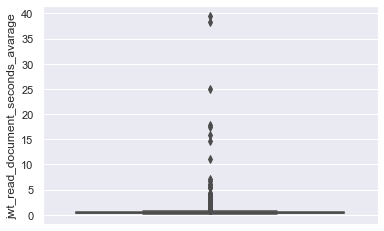

In [23]:
sns.boxplot(y="jwt_read_document_seconds_avarage", data=df_read)

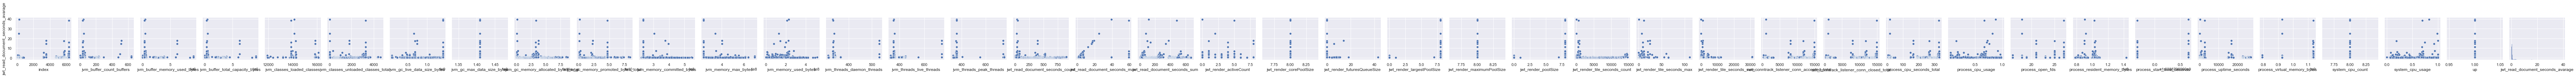

In [24]:
sns.pairplot(data=df_read,y_vars=["jwt_read_document_seconds_avarage"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


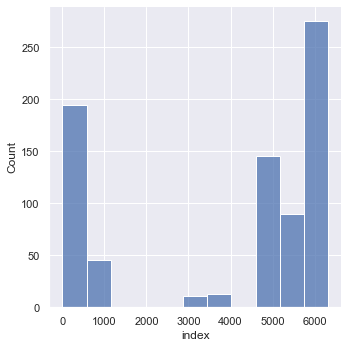

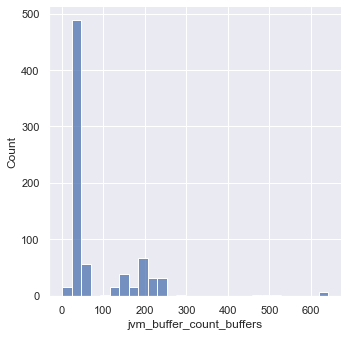

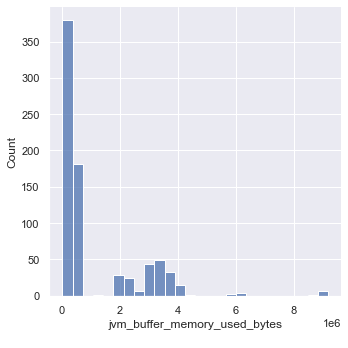

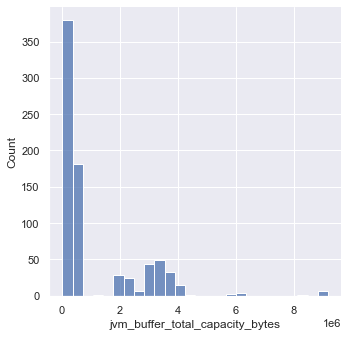

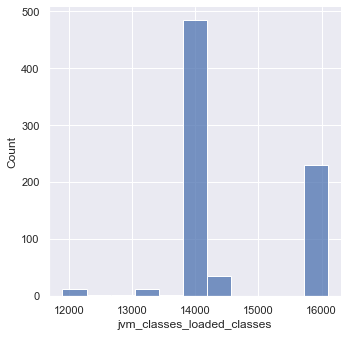

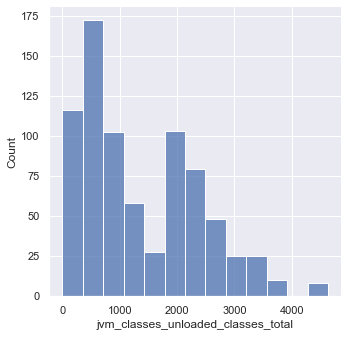

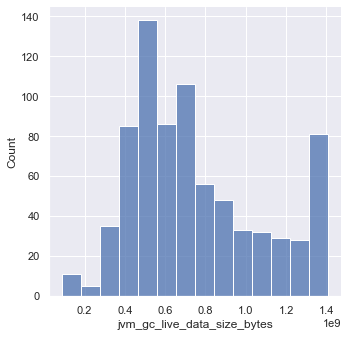

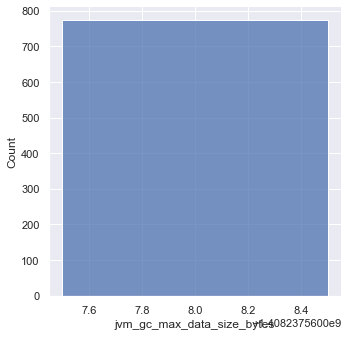

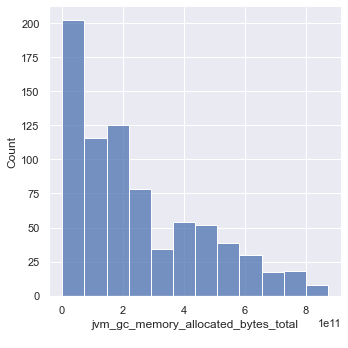

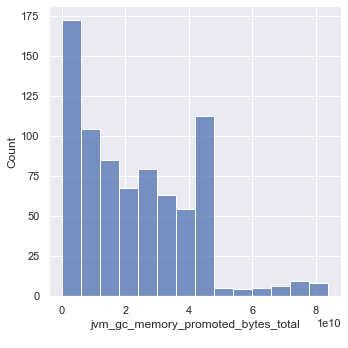

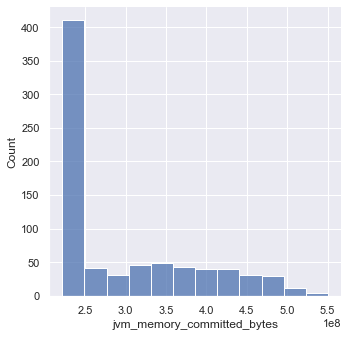

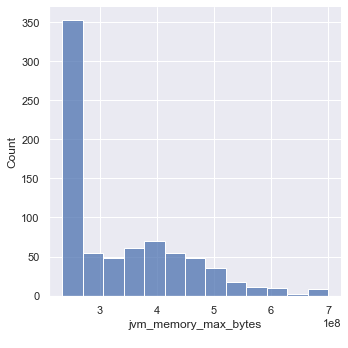

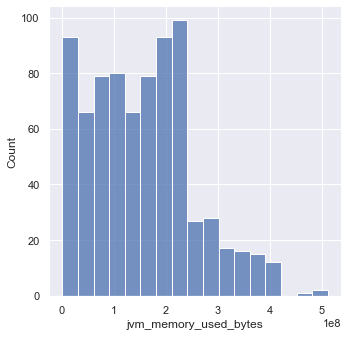

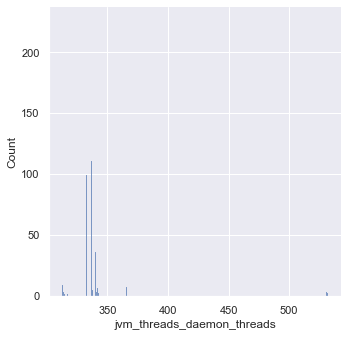

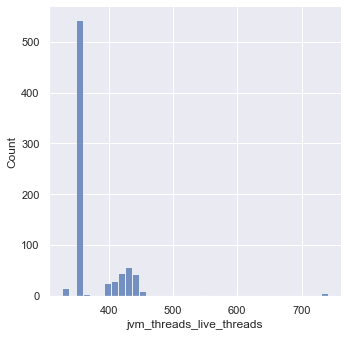

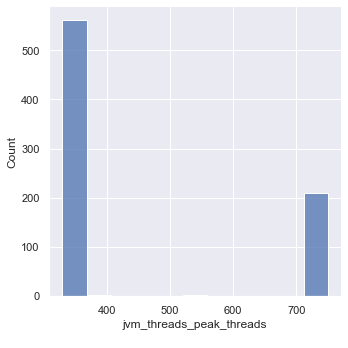

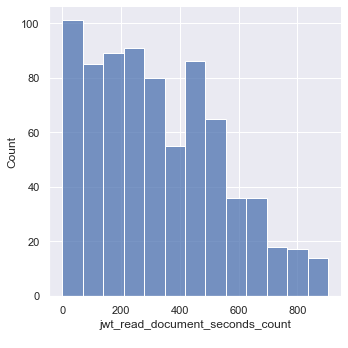

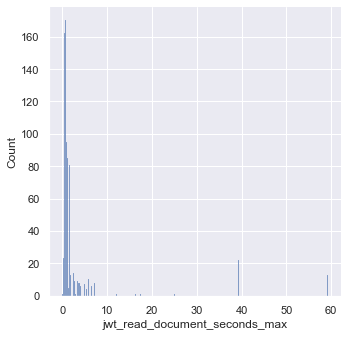

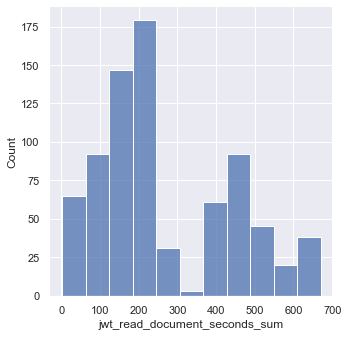

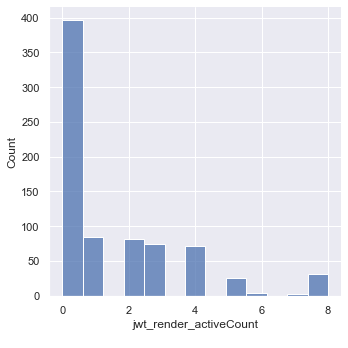

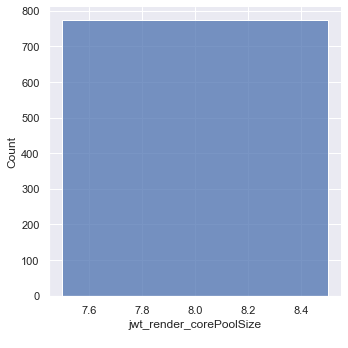

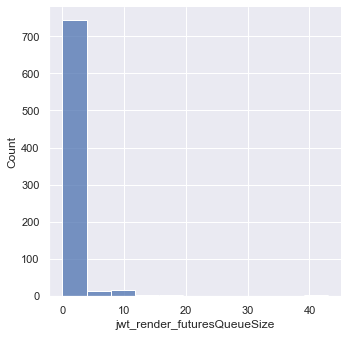

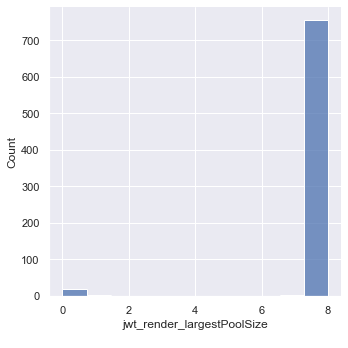

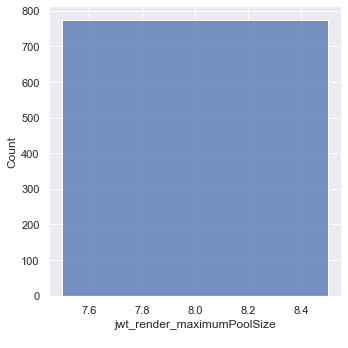

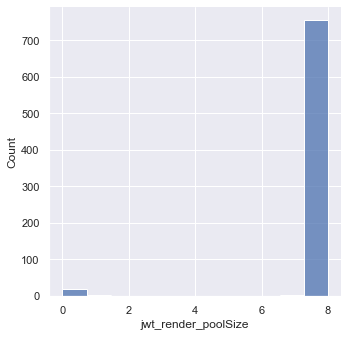

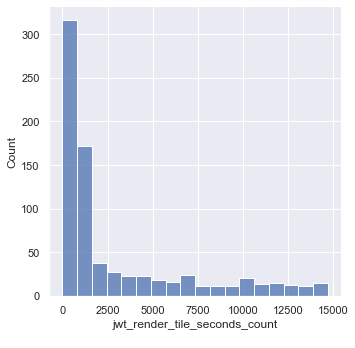

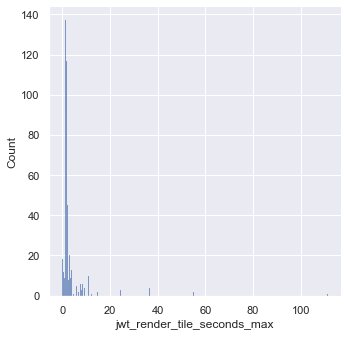

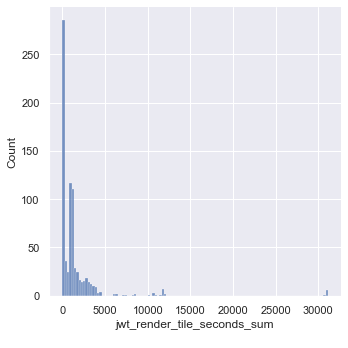

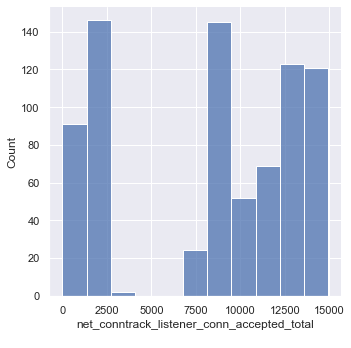

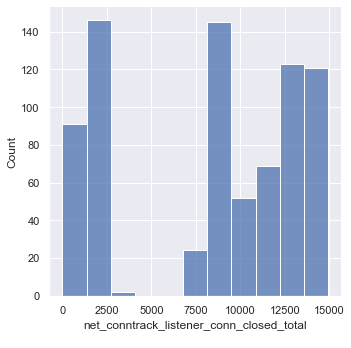

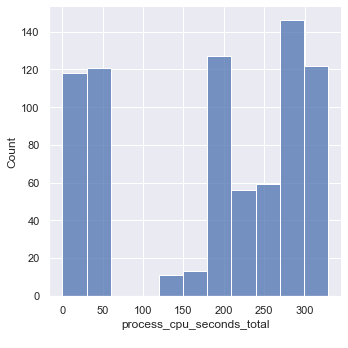

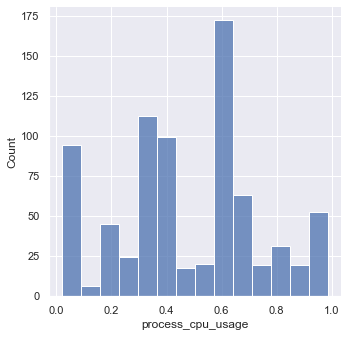

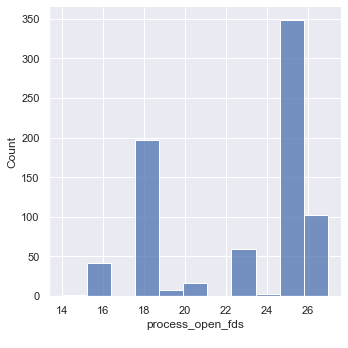

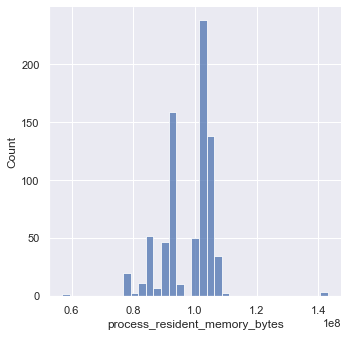

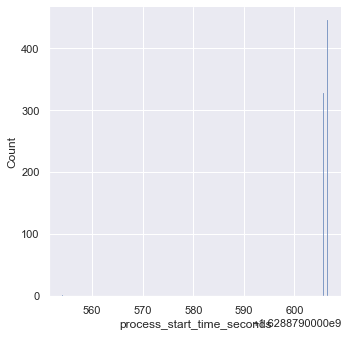

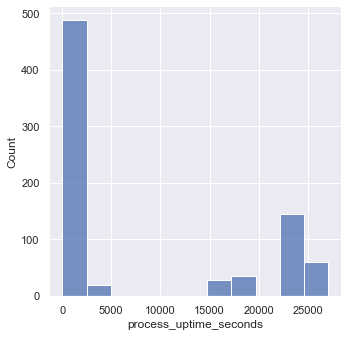

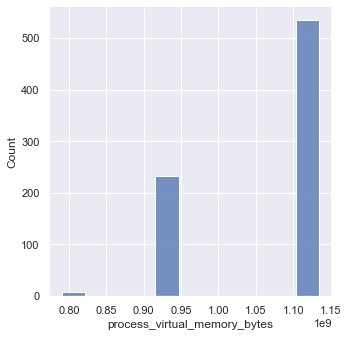

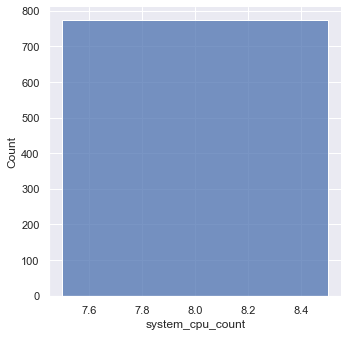

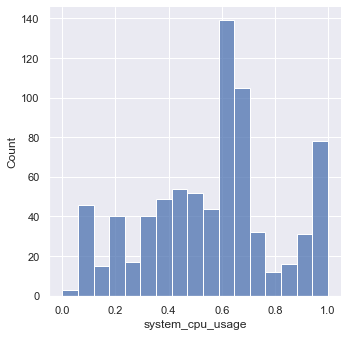

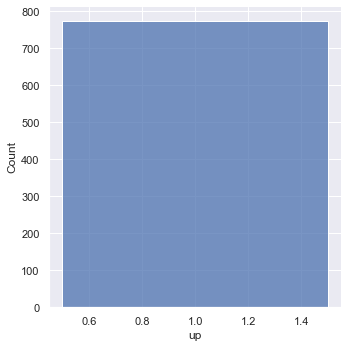

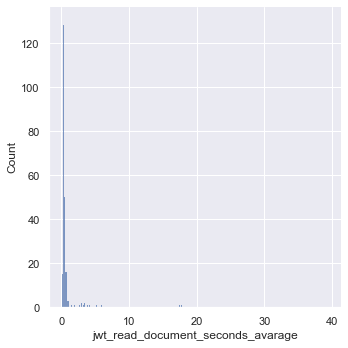

In [25]:
for i in df_read.columns: 
     sns.displot(df_read[i])

In [26]:
df_read = df_read.drop('index', axis = 1)

# 3. Data Preparation

In der Data Preparation Phase werden mehrere Schritte durchgeführt, um die Daten für die Analyse und das Modellieren vorzubereiten. Zunächst wird das Handling von Ausreißern durchgeführt, um die Datenqualität zu verbessern. Anschließend wird die Korrelation zwischen den Features überprüft, um zu entscheiden, welche Features für die Analyse relevant sind. In diesem Schritt wird auch Feature Scaling durchgeführt, um die Skalierung der Features zu normalisieren und damit das Modellieren zu erleichtern. Schließlich wird der Datensatz in Trainings- und Testdaten aufgeteilt, um das Modell später zu trainieren und zu testen.

## 3.1 Umgang mit Ausreißern

In diesem Schritt geht es darum, Ausreißer in den numerischen Merkmalen zu identifizieren und zu behandeln. Dazu werden die Merkmale ab dem 95-Quantil als Ausreißer bezeichnet und aus dem Datensatz entfernt. Dies wird gemacht, um eine Verzerrung der Analyse und des Modells zu vermeiden, da Ausreißer einen unverhältnismäßig großen Einfluss auf das Ergebnis haben können.

In [27]:
# print the information about each feature
df_read.describe(include="all")

,jvm_buffer_count_buffers\n,jvm_buffer_memory_used_bytes\n,jvm_buffer_total_capacity_bytes\n,jvm_classes_loaded_classes\n,jvm_classes_unloaded_classes_total\n,jvm_gc_live_data_size_bytes\n,jvm_gc_max_data_size_bytes\n,jvm_gc_memory_allocated_bytes_total\n,jvm_gc_memory_promoted_bytes_total\n,jvm_memory_committed_bytes\n,jvm_memory_max_bytes\n,jvm_memory_used_bytes\n,jvm_threads_daemon_threads\n,jvm_threads_live_threads\n,jvm_threads_peak_threads\n,jwt_read_document_seconds_count\n,jwt_read_document_seconds_max\n,jwt_read_document_seconds_sum\n,jwt_render_activeCount\n,jwt_render_corePoolSize\n,jwt_render_futuresQueueSize\n,jwt_render_largestPoolSize\n,jwt_render_maximumPoolSize\n,jwt_render_poolSize\n,jwt_render_tile_seconds_count\n,jwt_render_tile_seconds_max\n,jwt_render_tile_seconds_sum\n,net_conntrack_listener_conn_accepted_total\n,net_conntrack_listener_conn_closed_total\n,process_cpu_seconds_total\n,process_cpu_usage\n,process_open_fds\n,process_resident_memory_bytes\n,process_start_time_seconds\n,process_uptime_seconds\n,process_virtual_memory_bytes\n,system_cpu_count\n,system_cpu_usage\n,up,jwt_read_document_seconds_avarage
count,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,773.000000000,772.000000000
mean,85.212160414,1181013.557567917,1180971.166882277,14443.847347995,1351.931435964,754632921.842173338,1408237568.000000000,246067298556.046569824,23220364509.619663239,299807276.377749026,333622835.001293659,153831388.657179832,336.641655886,374.230271669,465.041397154,326.962483829,3.470251085,267.457858483,1.529107374,8.000000000,0.367399741,7.813712807,8.000000000,7.813712807,3009.773609314,5.271693244,1557.280118667,8438.328589909,8435.627425614,184.722833118,0.477116362,22.692108668,97996105.852522641,1628879606.168963671,8555.274279431,1068017142.064683080,8.000000000,0.560992362,1.000000000,0.821369947
std,91.711752809,1485433.806548158,1485224.919458966,944.860168663,1038.325088215,330602843.084775925,0.000000000,215822963837.893951416,18295523282.892650604,84775522.410201535,111322934.476180568,99642261.226310804,16.431902919,45.195588355,174.213007147,219.186312945,9.861611625,174.063918851,2.082680580,0.000000000,2.260169440,1.199727217,0.000000000,1.199727217,3901.470209694,12.313302811,3370.212353677,4841.456238146,4841.340014728,113.411381907,0.257065856,3.621095693,8055354.345603745,1.939573824,10350.089692219,98800244.121984109,0.000000000,0.247381253,0.000000000,2.555863093
min,2.000000000,12288.000000000,12288.000000000,11891.000000000,2.000000000,89473736.000000000,1408237568.000000000,1362100224.000000000,131555360.000000000,221773824.000000000,234881024.000000000,619976.000000000,313.000000000,328.000000000,330.000000000,1.000000000,0.000000000,1.718938100,0.000000000,8.000000000,0.000000000,0.000000000,8.000000000,0.000000000,2.000000000,0.000000000,1.066018600,1.000000000,0.000000000,0.100000000,0.021411749,14.000000000,56991744.000000000,1628879554.089999914,25.917000000,790884352.000000000,8.000000000,0.000000000,1.000000000,0.173240200
25%,34.000000000,341465.000000000,341465.000000000,13865.000000000,516.000000000,494145208.000000000,1408237568.000000000,67549689264.000000000,8072133064.000000000,234881024.000000000,234881024.000000000,73673520.000000000,334.000000000,351.000000000,359.000000000,149.000000000,0.608296100,140.248126202,0.000000000,8.000000000,0.000000000,8.000000000,8.000000000,8.000000000,461.000000000,1.318625800,189.356531198,2489.000000000,2488.000000000,36.600000000,0.318040889,18.000000000,923

In [28]:
# analyze outlier for the feature "jwt_read_document_seconds_avarage"
q = df_read["jwt_read_document_seconds_avarage"].quantile(0.95)
data_1 = df_read[df_read["jwt_read_document_seconds_avarage"]<q]
q

2.2357948472249785

In [29]:
# print the information about each feature
data_1.describe(include="all")

,jvm_buffer_count_buffers\n,jvm_buffer_memory_used_bytes\n,jvm_buffer_total_capacity_bytes\n,jvm_classes_loaded_classes\n,jvm_classes_unloaded_classes_total\n,jvm_gc_live_data_size_bytes\n,jvm_gc_max_data_size_bytes\n,jvm_gc_memory_allocated_bytes_total\n,jvm_gc_memory_promoted_bytes_total\n,jvm_memory_committed_bytes\n,jvm_memory_max_bytes\n,jvm_memory_used_bytes\n,jvm_threads_daemon_threads\n,jvm_threads_live_threads\n,jvm_threads_peak_threads\n,jwt_read_document_seconds_count\n,jwt_read_document_seconds_max\n,jwt_read_document_seconds_sum\n,jwt_render_activeCount\n,jwt_render_corePoolSize\n,jwt_render_futuresQueueSize\n,jwt_render_largestPoolSize\n,jwt_render_maximumPoolSize\n,jwt_render_poolSize\n,jwt_render_tile_seconds_count\n,jwt_render_tile_seconds_max\n,jwt_render_tile_seconds_sum\n,net_conntrack_listener_conn_accepted_total\n,net_conntrack_listener_conn_closed_total\n,process_cpu_seconds_total\n,process_cpu_usage\n,process_open_fds\n,process_resident_memory_bytes\n,process_start_time_seconds\n,process_uptime_seconds\n,process_virtual_memory_bytes\n,system_cpu_count\n,system_cpu_usage\n,up,jwt_read_document_seconds_avarage
count,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000,733.000000000
mean,85.798090041,1199313.825375170,1199269.121418827,14456.425648022,1340.927694407,743205695.476125479,1408237568.000000000,249279985447.705322266,23276832308.769439697,302224494.362892210,336047150.100954950,153551639.094133705,335.975443383,373.844474761,469.356070941,337.226466576,2.654022662,269.536177372,1.474761255,8.000000000,0.360163711,7.814461119,8.000000000,7.814461119,3066.594815825,4.958603892,1590.120693012,8292.008185539,8289.306957708,181.413710778,0.477812561,22.605729877,97945546.914051846,1628879606.254819155,8795.369923602,1066216136.469304204,8.000000000,0.562552063,1.000000000,0.455560181
std,89.546825963,1480186.436087974,1479965.905951441,953.388470356,1009.214939418,320931843.314803243,0.000000000,218085189290.634216309,18145388725.448169708,85735565.408867717,111042516.155860946,100902841.029402032,11.282727622,39.724603017,176.319746753,216.848164019,8.006193345,172.035869770,2.052182326,0.000000000,2.254599664,1.196971767,0.000000000,1.196971767,3878.958555280,12.314048561,3447.059971974,4814.875523411,4814.767668832,113.024687914,0.254620040,3.611051633,8007640.900811455,0.491262870,10489.041085542,98953821.351414308,0.000000000,0.244454464,0.000000000,0.237817929
min,2.000000000,12288.000000000,12288.000000000,11891.000000000,2.000000000,89473736.000000000,1408237568.000000000,1362100224.000000000,131555360.000000000,221773824.000000000,234881024.000000000,619976.000000000,313.000000000,328.000000000,330.000000000,1.000000000,0.349937000,1.718938100,0.000000000,8.000000000,0.000000000,0.000000000,8.000000000,0.000000000,2.000000000,0.000000000,1.066018600,321.000000000,318.000000000,5.200000000,0.048436795,16.000000000,78098432.000000000,1628879605.660000086,25.917000000,791146496.000000000,8.000000000,0.000000000,1.000000000,0.173240200
25%,34.000000000,341465.000000000,341465.000000000,13864.000000000,532.000000000,494145208.000000000,1408237568.000000000,72430733592.000000000,8405924008.000000000,234881024.000000000,234881024.000000000,72319168.000000000,334.000000000,351.000000000,359.000000000,168.000000000,0.584772200,144.266502702,0.000000000,8.000000000,0.000000000,8.000000000,8.000000000,8.000000000,461.000000000,1.318625800,189.356531198,2489.000000000,2488.000000000,36.510000000,0.320434570,18.00000000

<AxesSubplot:ylabel='jwt_read_document_seconds_avarage'>

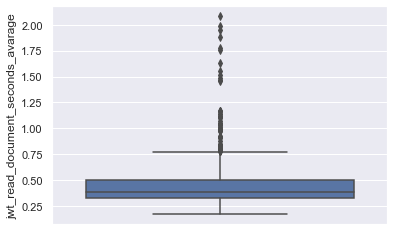

In [30]:
sns.boxplot(y="jwt_read_document_seconds_avarage", data=data_1)

## 3.2 Überprüfung der Korrelation zwischen Merkmalen

In diesem Schritt wird die Korrelation zwischen den Features untersucht, um Redundanz und Multikollinearität zu vermeiden. Dazu wird eine Korrelationsmatrix erstellt und die obere Dreiecksmatrix extrahiert, da die untere Hälfte eine Spiegelung der oberen ist. Anschließend werden die Features mit einer Korrelation größer als 0,75 als redundante Features identifiziert und aus dem Datensatz entfernt. Dies dient dazu, Overfitting zu vermeiden und die Leistung des Modells zu verbessern.

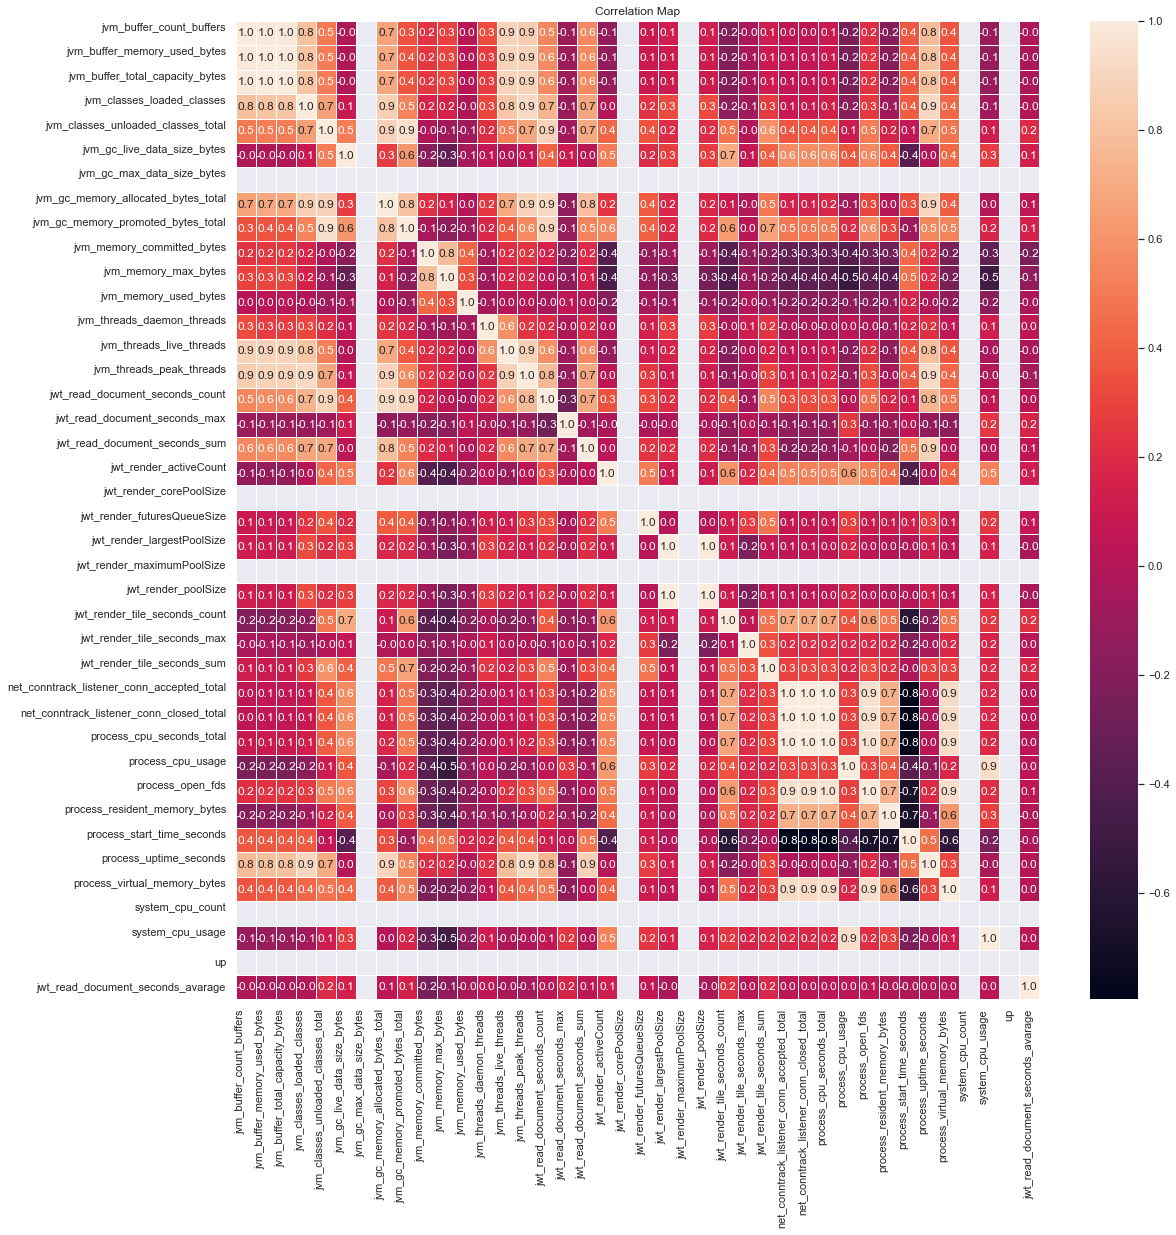

In [31]:
# look at the correlation between the numeric features
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_1.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Map")
plt.show()

In [32]:
read_irrelevant_metrics=['jvm_gc_max_data_size_bytes\n','jwt_render_corePoolSize\n',
                          'jwt_render_maximumPoolSize\n',
                          'system_cpu_count\n','up',"jwt_read_document_seconds_count\n","jwt_read_document_seconds_sum\n","jwt_read_document_seconds_max\n"]

In [33]:
data_1 = data_1.drop(columns=read_irrelevant_metrics)

In [34]:
data2 = data_1

In [35]:
# Create correlation matrix
corr_matrix = data2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop features 
data2.drop(to_drop, axis=1, inplace=True)

/var/folders/w6/65lhxpsx2_s1y2sh4rfcqv840000gn/T/ipykernel_87320/53783347.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


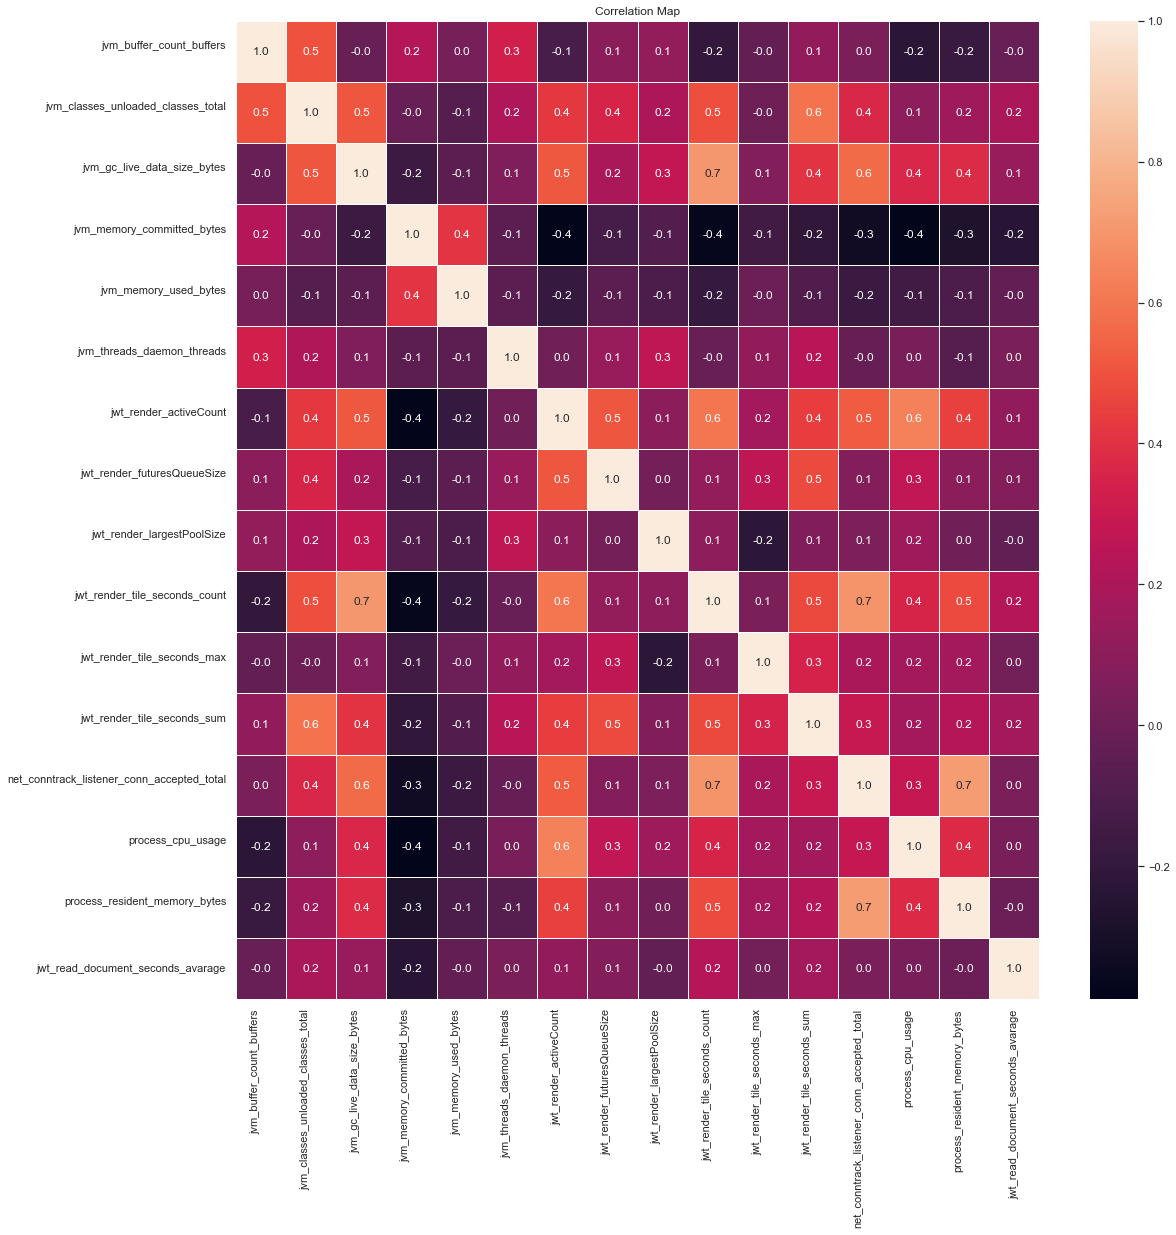

In [36]:
# look at the correlation between the numeric features
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data2.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Map")
plt.show()

In [37]:
data_cleaned = data2

In [38]:
data_cleaned.head()

,jvm_buffer_count_buffers\n,jvm_classes_unloaded_classes_total\n,jvm_gc_live_data_size_bytes\n,jvm_memory_committed_bytes\n,jvm_memory_used_bytes\n,jvm_threads_daemon_threads\n,jwt_render_activeCount\n,jwt_render_futuresQueueSize\n,jwt_render_largestPoolSize\n,jwt_render_tile_seconds_count\n,jwt_render_tile_seconds_max\n,jwt_render_tile_seconds_sum\n,net_conntrack_listener_conn_accepted_total\n,process_cpu_usage\n,process_resident_memory_bytes\n,jwt_read_document_seconds_avarage
86,53.000000000,757.000000000,575843416.000000000,311427072.000000000,65434568.000000000,336.000000000,0.000000000,0.000000000,8.000000000,348.000000000,0.046585200,151.187819100,321,0.115799675,79405056,1.140314200
87,54.000000000,757.000000000,575843416.000000000,311427072.000000000,164553400.000000000,336.000000000,0.000000000,0.000000000,8.000000000,349.000000000,0.075315600,151.263134700,321,0.062240245,79405056,0.321901600
94,55.000000000,757.000000000,575843416.000000000,296747008.000000000,87627432.000000000,336.000000000,0.000000000,0.000000000,8.000000000,350.000000000,0.075315600,151.328398900,368,0.067741752,81948672,0.489124600
95,56.000000000,757.000000000,575843416.000000000,296747008.000000000,177262088.000000000,336.000000000,0.000000000,0.000000000,8.000000000,351.000000000,0.075315600,151.400480600,368,0.057757770,81948672,0.602156100
142,46.000000000,994.000000000,353217312.000000000,246415360.000000000,42455992.000000000,337.000000000,0.000000000,0.000000000,8.000000000,361.000000000,0.738939800,153.198981800,619,0.352240870,84058112,0.487709100


## 3.3 Skalierung von Merkmalen

Hier wird die Skalierung der numerischen Variablen durchgeführt, um sicherzustellen, dass sie vergleichbar sind und keine Variable aufgrund ihrer Größenordnung eine größere Gewichtung im Modell hat als andere. Zunächst wird die Zielvariable vom Datensatz getrennt und dann werden die nicht-binären Variablen mit dem StandardScaler skaliert. Der StandardScaler transformiert die Variablen so, dass ihre Mittelwerte bei 0 und ihre Standardabweichungen bei 1 liegen.

In [39]:
data_cleaned.columns

Index(['jvm_buffer_count_buffers\n', 'jvm_classes_unloaded_classes_total\n',
       'jvm_gc_live_data_size_bytes\n', 'jvm_memory_committed_bytes\n',
       'jvm_memory_used_bytes\n', 'jvm_threads_daemon_threads\n',
       'jwt_render_activeCount\n', 'jwt_render_futuresQueueSize\n',
       'jwt_render_largestPoolSize\n', 'jwt_render_tile_seconds_count\n',
       'jwt_render_tile_seconds_max\n', 'jwt_render_tile_seconds_sum\n',
       'net_conntrack_listener_conn_accepted_total\n', 'process_cpu_usage\n',
       'process_resident_memory_bytes\n', 'jwt_read_document_seconds_avarage'],
      dtype='object')

In [40]:
# seperate the target from the features of the dataset
y = data_cleaned["jwt_read_document_seconds_avarage"]
X = data_cleaned.drop(labels = ["jwt_read_document_seconds_avarage"], axis=1)

In [41]:
# scaling of non-binary variables
scaler = StandardScaler()
scaler.fit(X)
inputs_scaled = scaler.transform(X)

## 3.4 Erstellen von Trainings- und Testdaten

In diesem Schritt wird die Datensatz in Trainings- und Testdaten aufgeteilt. Die Trainingsdaten werden verwendet, um das Modell zu trainieren, während die Testdaten verwendet werden, um die Leistung des Modells zu bewerten. Hier wurden 20% der Daten als Testdaten ausgewählt und der Rest als Trainingsdaten verwendet. Der Parameter "random_state" wird festgelegt, um sicherzustellen, dass bei jeder Ausführung des Skripts die gleiche Zufallsauswahl für die Aufteilung der Daten verwendet wird.

In [42]:
# data is split into test and training data sets. 20% of the data is used as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

# 4. Modelling

Im vierten Schritt, dem Modellieren, wurden verschiedene Machine-Learning-Algorithmen getestet und ausgewertet. Zunächst wurde eine lineare Regression durchgeführt, gefolgt von einem XGBoost-Regression-Modell. Ziel war es, das Verhalten der Zielvariable (die durchschnittlichen Lesezeiten) anhand der verbleibenden Merkmale vorherzusagen und zu modellieren. Die Wahl dieser beiden Algorithmen hing von den Daten und der Art des Problems ab, das gelöst werden sollte. Nach dem Training der Modelle wurden sie auf dem Testdatensatz ausgewertet und die Ergebnisse wurden verglichen und diskutiert, um zu sehen, welches Modell besser funktioniert.

## 4.1 Lineare Regression

In diesem Schritt wird ein lineares Regressionsmodell erstellt und auf den Trainingsdaten angepasst. Das Modell sucht eine lineare Beziehung zwischen den Eingabedaten (X) und der Zielvariable (y) und schätzt die Parameter, die diese Beziehung am besten beschreiben. Dies wird durch Minimierung der Residuen, die die Differenz zwischen den wahren Werten und den vom Modell vorhergesagten Werten sind, erreicht. Nachdem das Modell auf den Trainingsdaten angepasst wurde, kann es verwendet werden, um Vorhersagen auf neuen Daten (Testdaten) zu treffen.

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [45]:
print('training performance')
print(lm.score(X_train,y_train))
print('test performance')
print(lm.score(X_test,y_test))

training performance
0.19377040570353654
test performance
-0.4001238664855844


In [46]:
lm.coef_

array([ 1.45221295e-04,  4.14475179e-05,  4.99187780e-11, -8.34241685e-10,
        2.41352078e-10,  7.51535631e-03,  1.48095072e-03, -4.07837864e-03,
       -4.98571089e-02,  2.11916002e-05,  3.88641797e-04, -9.38879106e-06,
       -1.29260288e-05, -4.11754613e-02, -1.36702292e-09])

In [47]:
print(lm.intercept_)

-1.3597510832784565


In [48]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
jvm_buffer_count_buffers\n,0.000145221
jvm_classes_unloaded_classes_total\n,0.000041448
jvm_gc_live_data_size_bytes\n,0.000000000
jvm_memory_committed_bytes\n,-0.000000001
jvm_memory_used_bytes\n,0.000000000
jvm_threads_daemon_threads\n,0.007515356
jwt_render_activeCount\n,0.001480951
jwt_render_futuresQueueSize\n,-0.004078379
jwt_render_largestPoolSize\n,-0.049857109
jwt_render_tile_seconds_count\n,0.000021192


In [49]:
predictions = lm.predict(X_test)

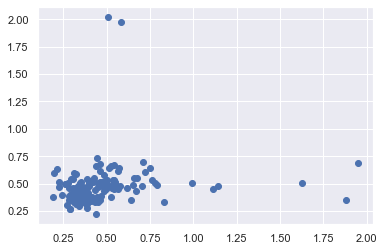

In [50]:
plt.scatter(y_test,predictions)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


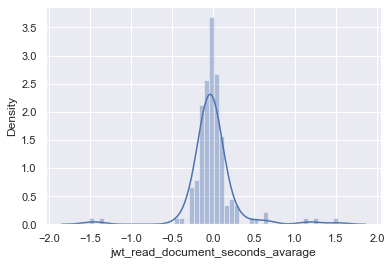

In [51]:
sns.distplot((y_test-predictions),bins=50);

In [52]:
from sklearn import metrics

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.15712402569156253
MSE: 0.08976027832692092
RMSE: 0.29960019747476957


In [54]:
linreg_summary = pd.DataFrame(X.columns, columns = ["Features"])
linreg_summary["Weights"] = lm.coef_
linreg_summary

,Features,Weights
0,jvm_buffer_count_buffers\n,0.000145221
1,jvm_classes_unloaded_classes_total\n,0.000041448
2,jvm_gc_live_data_size_bytes\n,0.000000000
3,jvm_memory_committed_bytes\n,-0.000000001
4,jvm_memory_used_bytes\n,0.000000000
5,jvm_threads_daemon_threads\n,0.007515356
6,jwt_render_activeCount\n,0.001480951
7,jwt_render_futuresQueueSize\n,-0.004078379
8,jwt_render_largestPoolSize\n,-0.049857109
9,jwt_render_tile_seconds_count\n,0.000021192


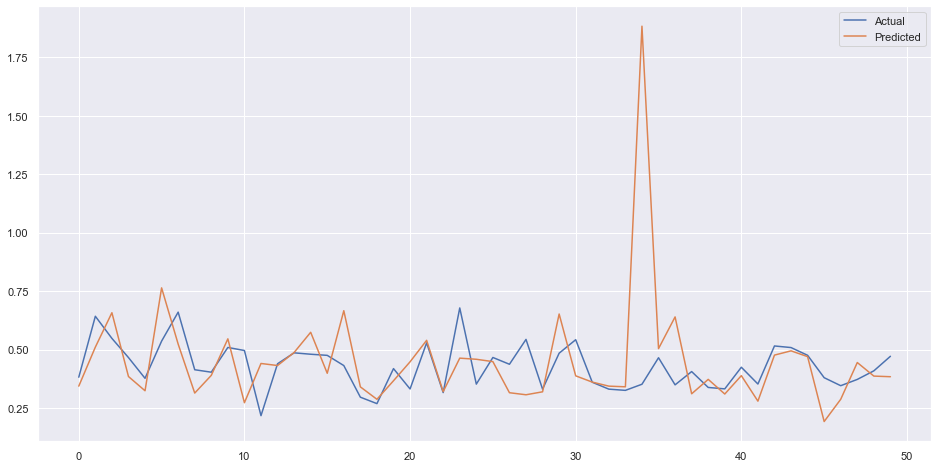

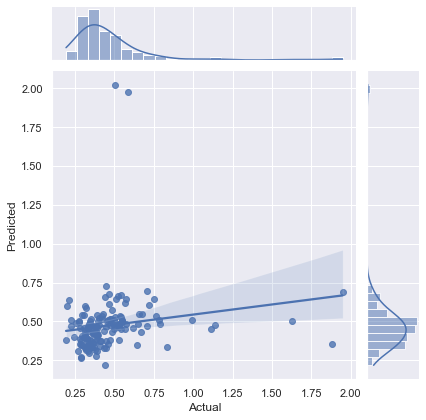

In [55]:
y_hat = lm.predict(X_test)
test = pd.DataFrame({'Predicted':y_hat,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

Dieser Code verwendet ein trainiertes LinearRegression-Modell, um Vorhersagen für den Testdatensatz zu generieren. Es erstellt ein Pandas-Datenrahmen, der die tatsächlichen Testwerte und die vom Modell vorhergesagten Werte enthält. Dann wird ein Liniendiagramm erstellt, das die ersten 100 Zeilen dieses Datenrahmens darstellt und die tatsächlichen Werte und die vom Modell vorhergesagten Werte vergleicht.

## 4.2 XGBoost Regresion Model

In [56]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [57]:
print('training performance')
print(xgb.score(X_train,y_train))
print('test performance')
print(xgb.score(X_test,y_test))

training performance
0.9980147806947023
test performance
0.2862136251105801


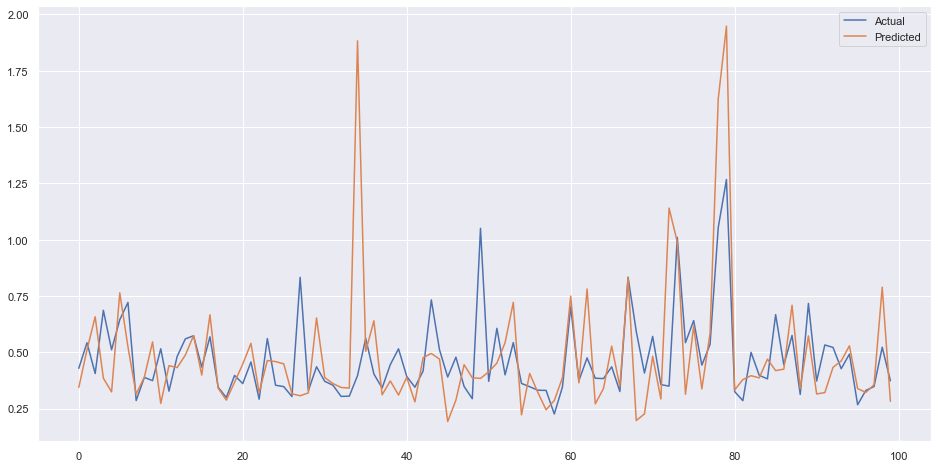

In [58]:
y_hat= xgb.predict(X_test)
test = pd.DataFrame({'Predicted':y_hat,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])

Dieser Code verwendet ein trainiertes XGBoost-Modell, um Vorhersagen für den Testdatensatz zu generieren. Es erstellt ein Pandas-Datenrahmen, der die tatsächlichen Testwerte und die vom Modell vorhergesagten Werte enthält. Dann wird ein Liniendiagramm erstellt, das die ersten 100 Zeilen dieses Datenrahmens darstellt und die tatsächlichen Werte und die vom Modell vorhergesagten Werte vergleicht.

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

0.2862136251105801

In [60]:
predictionsxgb = xgb.predict(X_test)

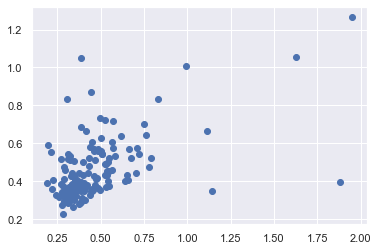

In [61]:
plt.scatter(y_test,predictionsxgb)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


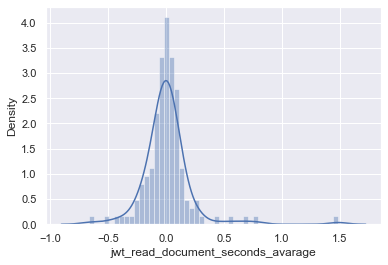

In [62]:
sns.distplot((y_test-predictionsxgb),bins=50);

## Vergleich der Machine Learning Methoden

Die beiden Code-Abschnitte berechnen die Mean Absolute Error (MAE), Mean Squared Error (MSE) und Root Mean Squared Error (RMSE) der Vorhersagen zweier Modelle, nämlich eines XGBoost-Modells und eines linearen Regressionsmodells. Die Ergebnisse zeigen, dass das XGBoost-Modell bessere Vorhersagen liefert als das lineare Regressionsmodell, da es kleinere Fehlerwerte aufweist.

### Regressions Auswertungsmetriken

Hier sind drei der üblichen Metriken zur Auswertung von Regressions Aufgaben:

**Mean Absolute Error** (MAE) ist der Durchschnitt des absoluten Werts der Errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) ist der Durchschnitt der quadrierten Errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RSME) ist die Quadratwurzel des Durchschnitts der quardrierten Errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Diese Matriken vergleichen:

* **MAE** ist am leichtesten zu verstehen, da sie den durchschnittlichen Error angibt
* **MSE** ist verbreiteter, da MSE die größeren Errors "bestraft", was in der realen Welt nützlich ist
* **RSME** ist sogar noch verbreiteter als MSE, da RMSE in "y" Einheiten interpretierbar ist

Alle drei sind sogenannte *loss functions*, da wir sie minimieren wollen!

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, predictionsxgb))
print('MSE:', metrics.mean_squared_error(y_test, predictionsxgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictionsxgb)))

MAE: 0.12326496817847006
MSE: 0.045759996818608546
RMSE: 0.21391586387785397


In [64]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.15712402569156253
MSE: 0.08976027832692092
RMSE: 0.29960019747476957
